In [1]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)#setting maximum column width
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#To create wordcloud
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
df=pd.read_csv('Preprocessed data.csv')

In [3]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Age,Age_group,Country
0,2005018,Clara Callan,RICHARD BRUCE WRIGHT,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,16,Teens,CANADA
1,60973129,Decision in Normandy,CARLO D'ESTE,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,8,8,16,Teens,CANADA
2,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,GINA BARI KOLATA,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg,8,7,16,Teens,CANADA
3,399135782,The Kitchen God's Wife,AMY TAN,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg,8,9,16,Teens,CANADA
4,425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,ROBERT COWLEY,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg,8,8,16,Teens,CANADA


In [4]:
df.shape

(851385, 11)

In [5]:
df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L', 'User-ID', 'Book-Rating', 'Age', 'Age_group', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851385 entries, 0 to 851384
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 851385 non-null  object
 1   Book-Title           851385 non-null  object
 2   Book-Author          851375 non-null  object
 3   Year-Of-Publication  851385 non-null  int64 
 4   Publisher            851385 non-null  object
 5   Image-URL-L          851385 non-null  object
 6   User-ID              851385 non-null  int64 
 7   Book-Rating          851385 non-null  int64 
 8   Age                  851385 non-null  int64 
 9   Age_group            851385 non-null  object
 10  Country              851385 non-null  object
dtypes: int64(4), object(7)
memory usage: 71.5+ MB


###  Most Popular Rating

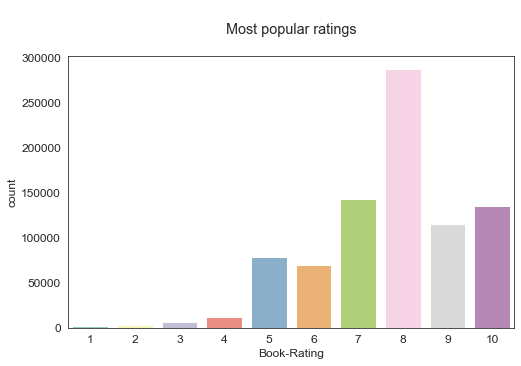

In [7]:
# most popular rating
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating',palette='Set3')
plt.show()

8 is the most common rating given by users

### Age Distribution of Users

C:\Users\joffi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


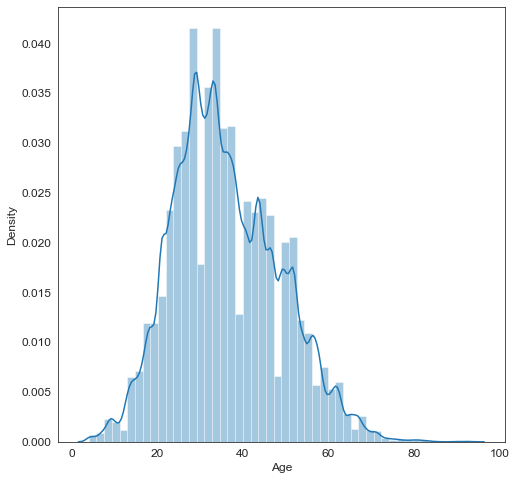

In [8]:
#Age distribution of users
age_df=df[df['User-ID'].isin(list(df['User-ID'].unique()))]
sns.distplot(age_df.Age)
plt.show()

The majority of readers are between the ages of 25 and 40.

Readers who are 80 to 100 years old make up a tiny minority.

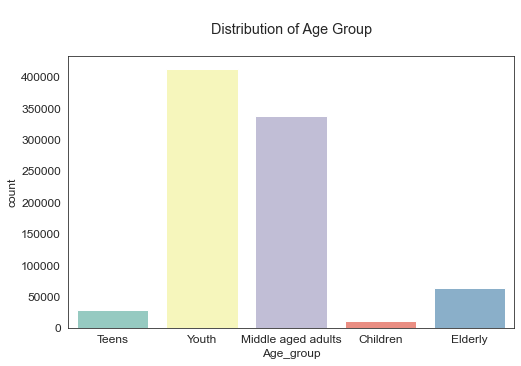

In [9]:
# most popular age group
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nDistribution of Age Group\n')
sns.countplot(data=df, x='Age_group',palette='Set3')
plt.show()

The majority of readers are Youth and Middle aged Adults

### Most Popular Books

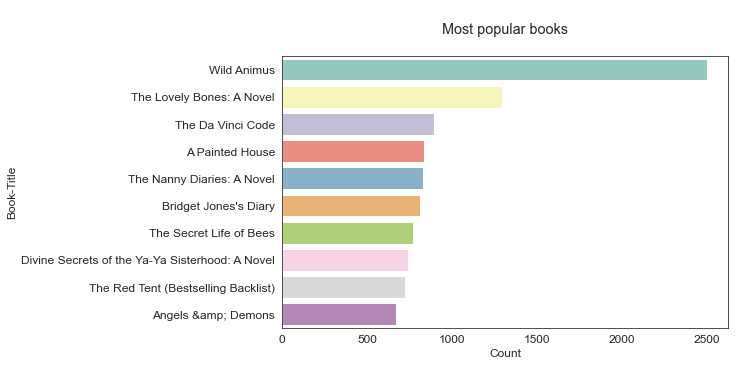

In [10]:
# top 10 most popular books

popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set3')
plt.show()

### Author with most number of Books

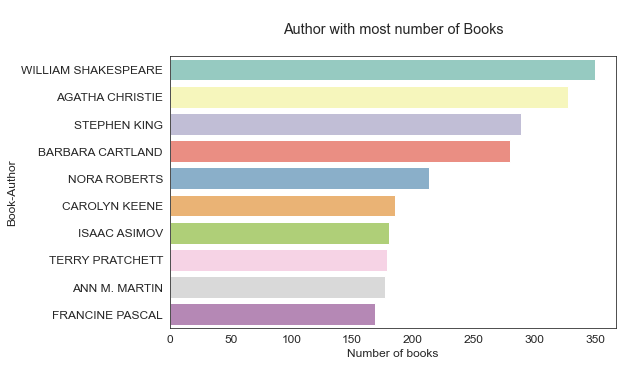

In [11]:
# most popular book authors
author_books = df.groupby('Book-Author')['Book-Title'].nunique()
top_authors = author_books.sort_values(ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nAuthor with most number of Books\n')
plt.ylabel("Author")
plt.xlabel("Number of books")
sns.barplot(y=top_authors.index, x=top_authors.values,palette='Set3')
plt.show()

### Most Popular Author

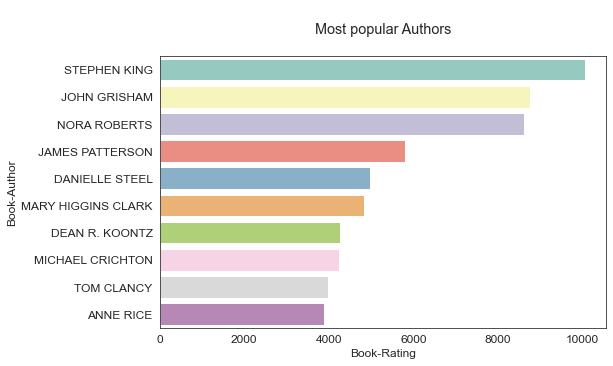

In [12]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set3')
plt.show()

Top book author with respect to the number of ratings is Stephen King

### Country wise Distribution of Readers

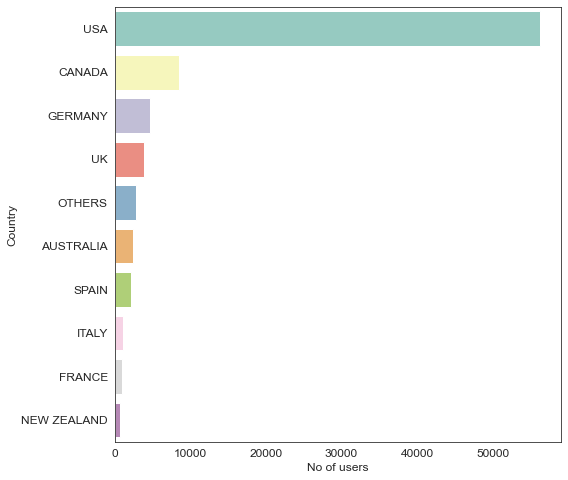

In [13]:
# countries with most readers
countries = df.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set3')
plt.xlabel('No of users')
plt.show()

Most of the readers are from the United States

### Publisher with most books

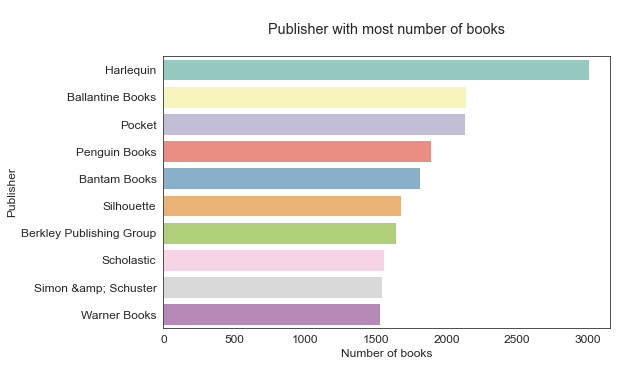

In [14]:
# Publisher with most number of books
author_books = df.groupby('Publisher')['Book-Title'].nunique()
top_authors = author_books.sort_values(ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nPublisher with most number of books\n')
plt.ylabel('Publisher')
plt.xlabel("Number of books")
sns.barplot(y=top_authors.index, x=top_authors.values,palette='Set3')
plt.show()

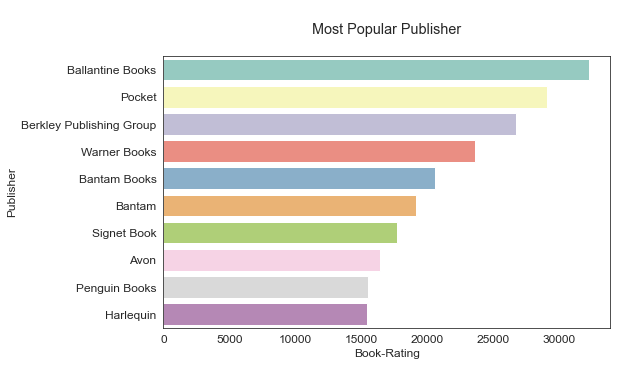

In [15]:
# Most Popular Publisher

publishers = df.groupby('Publisher')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.title('\nMost Popular Publisher\n')
sns.barplot(data=publishers, x='Book-Rating', y='Publisher',palette='Set3')
plt.show()

###  Most Popular books among different age groups

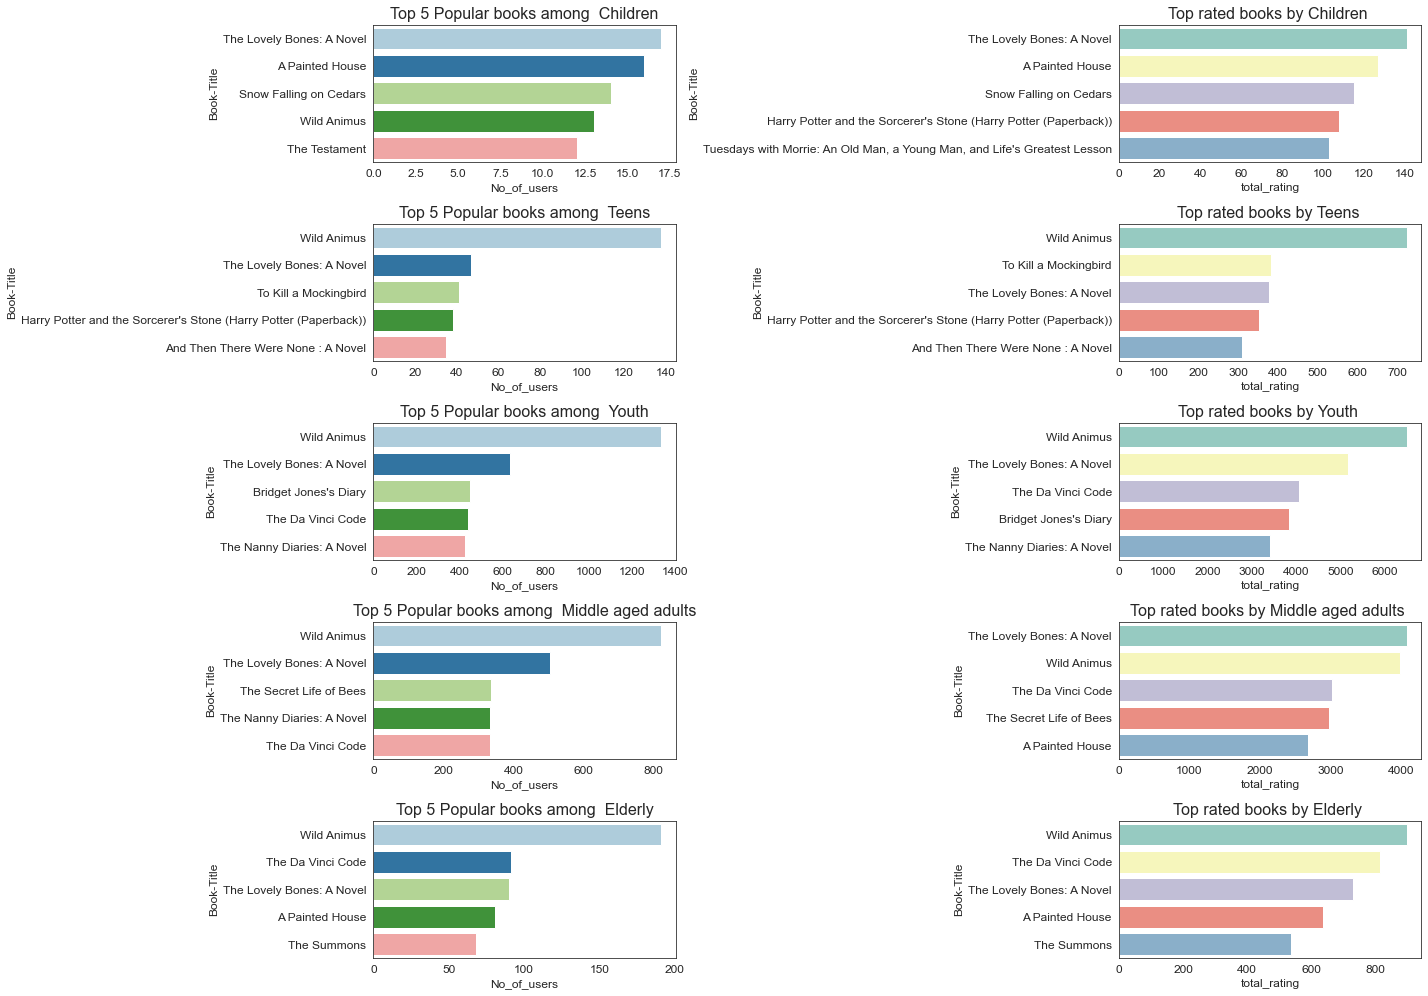

In [45]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=df.loc[df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set3',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

### Book with most average rating

In [17]:
### Books with atleat 100 ratings is only considered

In [18]:
df1=df

In [19]:
book_avg_rating = df1.groupby(['ISBN', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_avg_rating = book_avg_rating.reset_index(level=['ISBN', 'Book-Title', 'Book-Author','Year-Of-Publication', 'Publisher', 'Image-URL-L'])
book_avg_rating.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L', 'ratings_count', 'avg_rating'],
      dtype='object')

In [20]:
np.mean(book_avg_rating[['avg_rating']])

avg_rating    7.548373
dtype: float64

In [21]:
np.mean(book_avg_rating[['ratings_count']])

ratings_count    5.689032
dtype: float64

In [22]:
top_rated_books = book_avg_rating[(book_avg_rating['avg_rating']>7.548373) & (book_avg_rating['ratings_count']>100)]
top_rated_books = top_rated_books.sort_values(by='avg_rating',ascending=False).head(10)
top_rated_books.head(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,ratings_count,avg_rating
49200,345339738,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339738.01.LZZZZZZZ.jpg,173,9.73
3808,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. ROWLING,2001,Scholastic,http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg,104,9.60
49199,345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.01.LZZZZZZZ.jpg,177,9.59
4846,055321313X,Anne of Green Gables (Anne of Green Gables Novels (Paperback)),L.M. MONTGOMERY,1982,Bantam Classics,http://images.amazon.com/images/P/055321313X.01.LZZZZZZZ.jpg,131,9.56


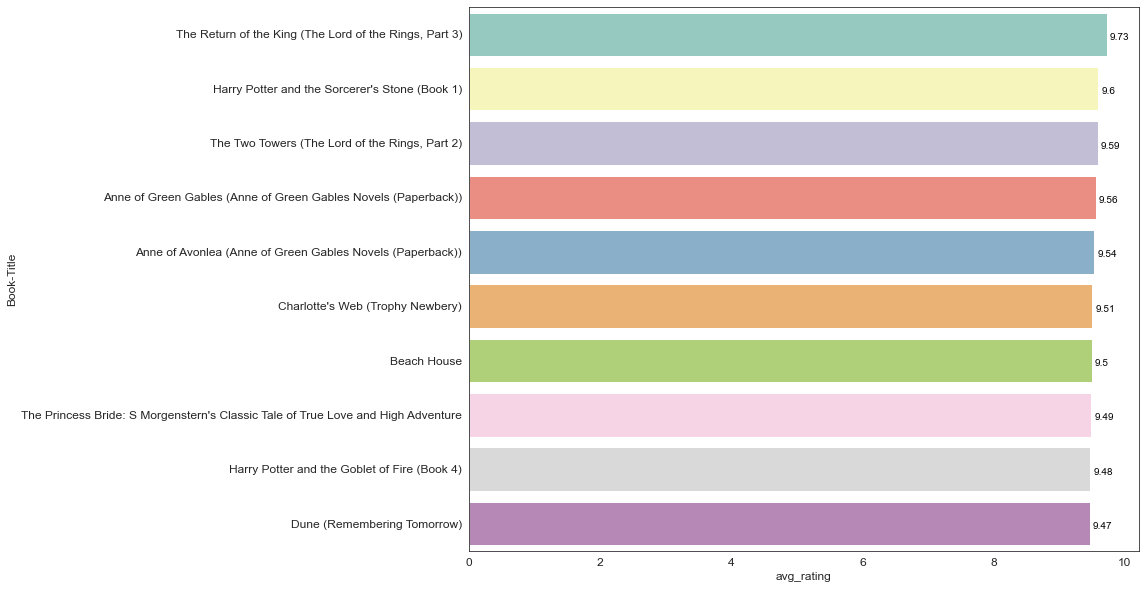

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set3')
ax = sns.barplot(x='avg_rating',y='Book-Title',data=top_rated_books,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.show()

### Relationship between Rating and Vote

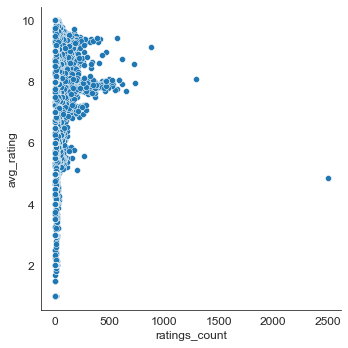

In [24]:
ax = sns.relplot(x='ratings_count',y='avg_rating',data= book_avg_rating,marker='o')

### Average rating of each Authors

In [25]:
item_book_ratings=book_avg_rating

In [26]:
item_book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L', 'ratings_count', 'avg_rating'],
      dtype='object')

In [27]:
item_book_ratings['Book-Author'].unique()

array(['T.S. ELIOT', 'ELLIS PETERS', 'CAROLYN KEENE', ...,
       'SERGE NORMANT', 'P ED VARNEDOE/ANTONELLI KICK',
       'NEW YORK PUBLIC LIBRARY'], dtype=object)

In [28]:
def get_only_author(authors):
    return authors.split('/')[0]

In [29]:
df_only_author = item_book_ratings.copy()

In [30]:
df_only_author['pr_author'] = df_only_author['Book-Author'].apply(lambda x: get_only_author(x))

In [31]:
len(df_only_author)

149652

In [32]:
average_ratings = df_only_author.drop_duplicates(subset=['pr_author', 'Book-Title'], keep='first')
len(average_ratings)

139029

In [33]:
average = df_only_author.groupby('pr_author').agg(average_ratings=('avg_rating','mean')).reset_index()
average = average.sort_values(by='average_ratings',ascending=False).round(2)
average

,pr_author,average_ratings
0,D. CHIEL,10.0
33901,LAURALEE SUMMER,10.0
33934,LAUREN ARIEV,10.0
33933,LAUREN A. MILLS,10.0
33929,"LAUREL, DR. CLARK",10.0
...,...,...
59626,WILLIAM ONCKEN,1.0
45356,PEACE CORPS,1.0
24192,JACK HANSON,1.0
56869,TOCQUEVILLE DE,1.0


In [34]:
total_books = df_only_author.groupby('pr_author').agg(total_books=('Book-Title','nunique')).reset_index()
total_books = total_books.sort_values(by='total_books',ascending=False)
total_books

,pr_author,total_books
59714,WILLIAM SHAKESPEARE,350
548,AGATHA CHRISTIE,328
53876,STEPHEN KING,289
4276,BARBARA CARTLAND,280
43344,NORA ROBERTS,213
...,...,...
23361,INGE MEYER-DIETRICH,1
23362,INGE SARGENT,1
23363,INGE. TRACHTENBERG,1
23365,INGEBORG BOYENS,1


In [35]:
avg_r_by_author = pd.merge(average, total_books, on = 'pr_author', how ='outer')
avg_r_by_author = avg_r_by_author[avg_r_by_author['total_books']>150]
avg_r_by_author

,pr_author,average_ratings,total_books
17730,TERRY PRATCHETT,8.43,179
17950,WILLIAM SHAKESPEARE,8.37,350
19854,NOT APPLICABLE (NA ),8.04,163
29788,ISAAC ASIMOV,7.86,180
30069,NORA ROBERTS,7.81,213
30344,AGATHA CHRISTIE,7.76,328
30356,CAROLYN KEENE,7.76,185
31476,PIERS ANTHONY,7.65,151
31477,CHARLES DICKENS,7.65,162
32036,STEPHEN KING,7.54,289


In [36]:
avg_r_by_author1=avg_r_by_author[avg_r_by_author['pr_author']!='NOT APPLICABLE (NA )']
avg_r_by_author1

,pr_author,average_ratings,total_books
17730,TERRY PRATCHETT,8.43,179
17950,WILLIAM SHAKESPEARE,8.37,350
29788,ISAAC ASIMOV,7.86,180
30069,NORA ROBERTS,7.81,213
30344,AGATHA CHRISTIE,7.76,328
30356,CAROLYN KEENE,7.76,185
31476,PIERS ANTHONY,7.65,151
31477,CHARLES DICKENS,7.65,162
32036,STEPHEN KING,7.54,289
43712,R. L. STINE,6.88,161


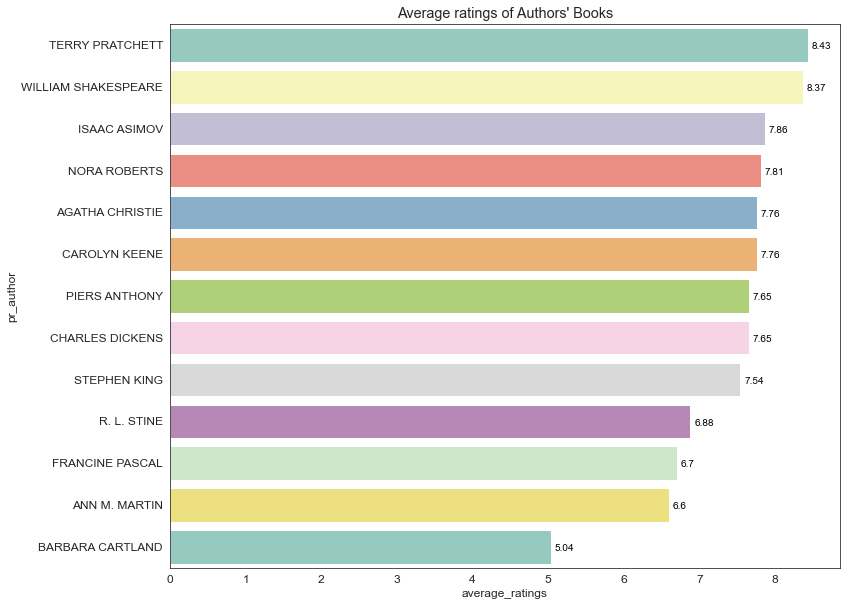

In [37]:
sns.set_style('white')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set3')
ax = sns.barplot(x='average_ratings',y='pr_author',data=avg_r_by_author1,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Average ratings of Authors' Books")
plt.show()

### Word Cloud

In [38]:
titles = df['Book-Title'].unique()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

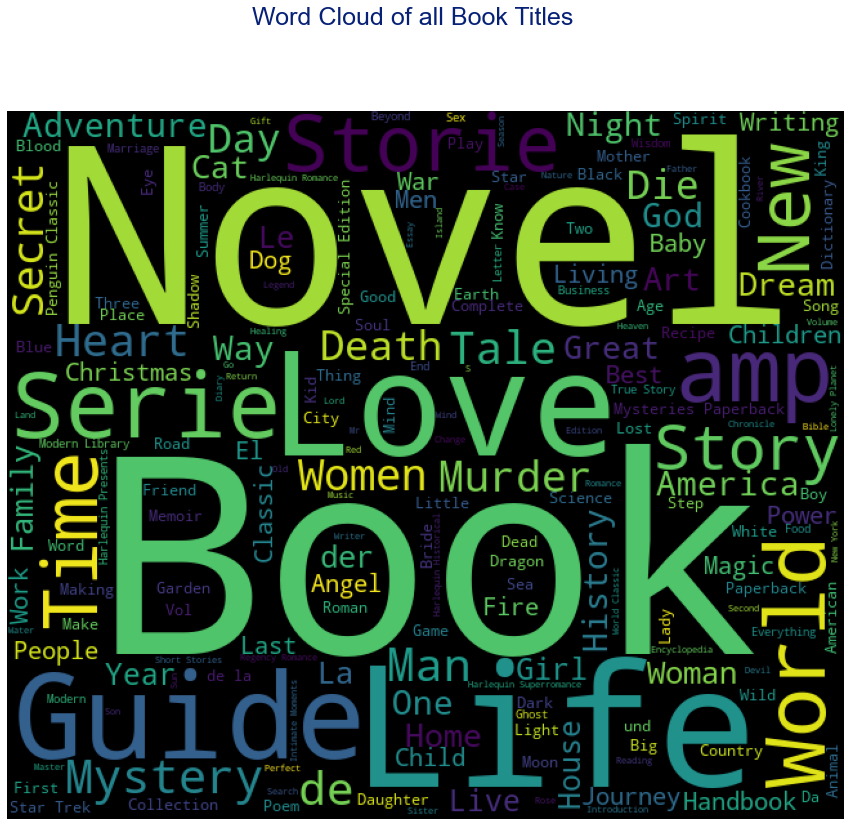

In [47]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(titles))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Word Cloud of all Book Titles', color='#062175', fontsize=25, ha='center')
plt.show()

In [40]:
df2=df

In [41]:
df2 = df2.dropna(how='any',axis=0) 

TypeError: can only join an iterable

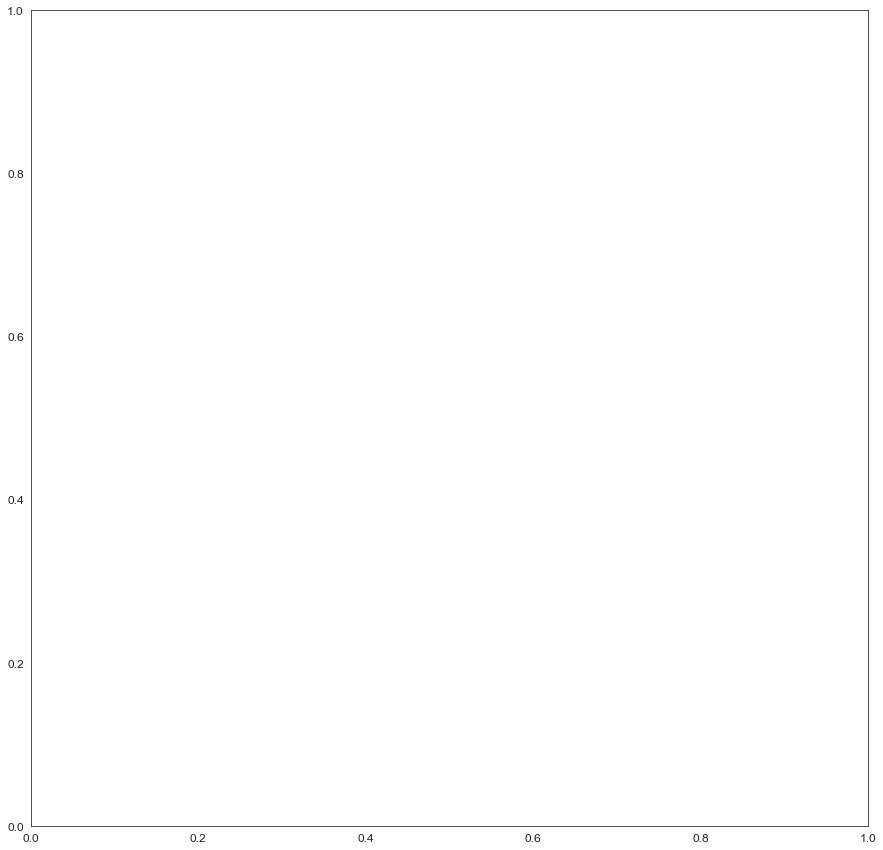

In [42]:
author = df2['Book-Author'].unique
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(author))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All Authors', color='#062175', fontsize=25, ha='center')
plt.show()